<a href="https://colab.research.google.com/github/Chathzaa/Bike-Rental-Demand-Prediction/blob/main/Bike_Rental_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Bike Rental Demand Prediction  </u></b>
# <b> Group Number : 28 </b>

## Group Members :
- **EG/2021/4685** - Muthukumari H.M.S.
- **EG/2021/4775** - Samarasinghe C.Y.


## <b> Introduction </b>

### The project focuses on building a predictive model to forecast hourly bike rental demand in a city's bike-sharing system. By analyzing historical rental data over two years, along with factors like weather conditions, temperature, humidity, and whether a day is a holiday or a working day, the project aims to identify key factors influencing bike usage. Data preprocessing, feature engineering, and machine learning models such as Linear Regression and Random Forest will be utilize.The goal is to provide insights for better bike resource management and urban transportation planning.
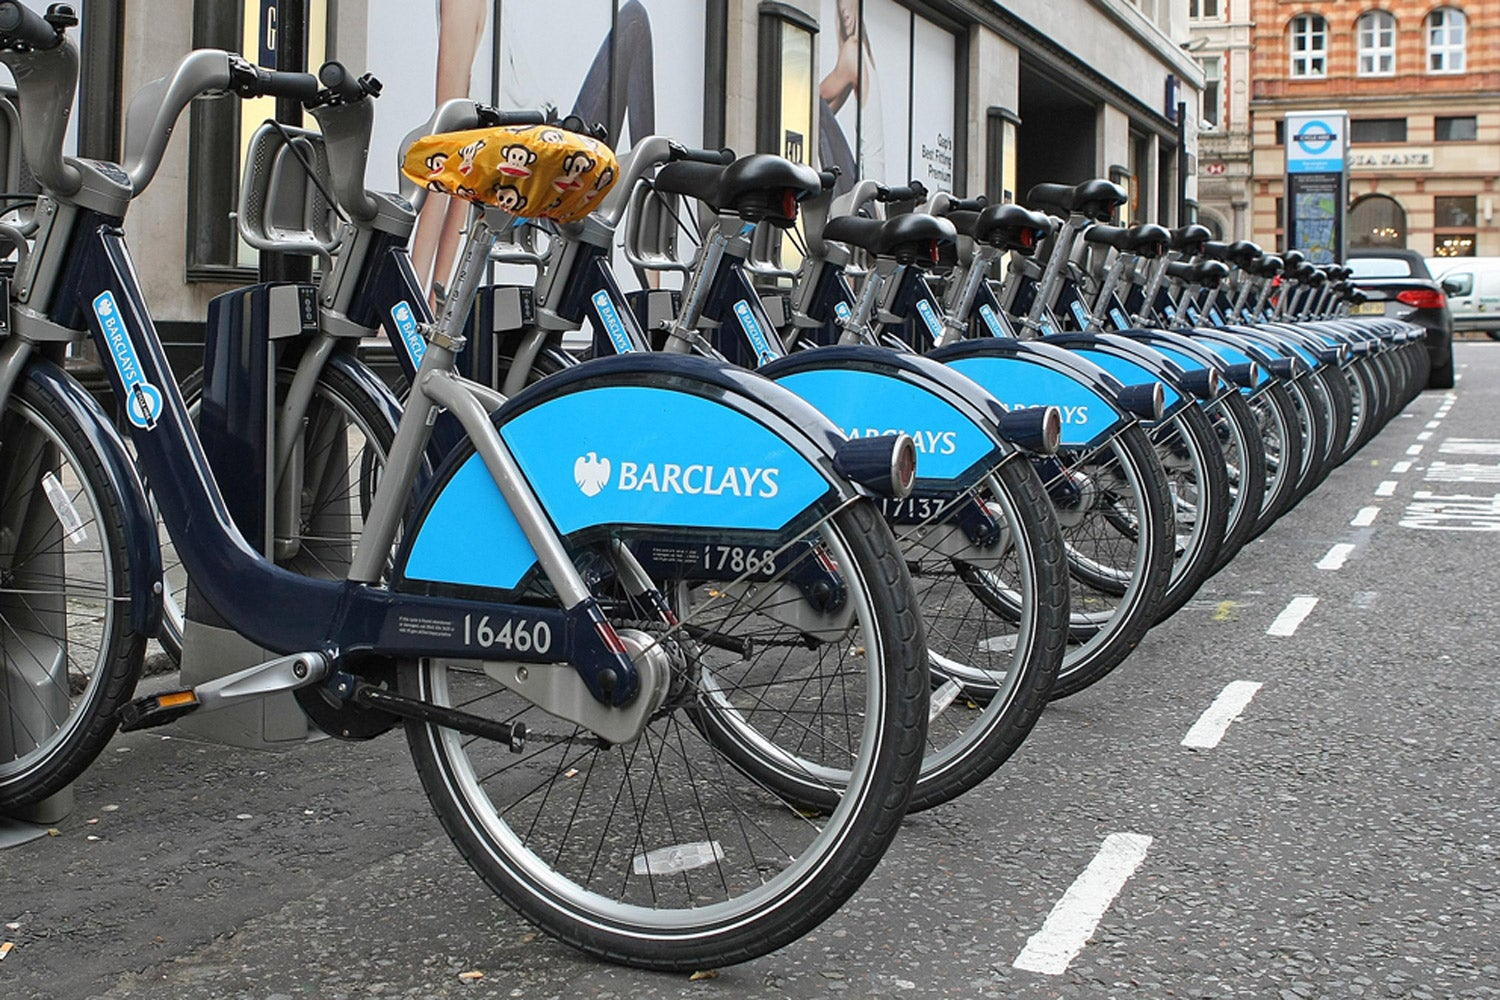

## <b> Literature Survey </b>

- **Review existing research papers or case studies on bike rental demand forecasting from Article  in  Journal of Innovative Computing and Emerging Technologies, March 2023**


 Their  This research estimated bike-sharing demand using Bike dataset. CUBIST outperforms RRF, CART, KNN, and CIT in R2, RMSE, MAE,
and CV. CUBIST can predict bike-share demand. Analyzing variable importance revealed hidden links. In all models, temperature or hour
best predicted bike rental demand. This study found many links. This increases knowledge. It helps model hourly bike rental demand.
CUBIST improves learning algorithms using rule-based learning. This study compares CUBIST to RRF, CART, KNN, and CIT to show
its superiority in hourly rental bike demand forecasting. These results help academics predict hourly bike rental demand and expand
empirically-based algorithms. Future research will predict seasonal bike rental demand district-wide.

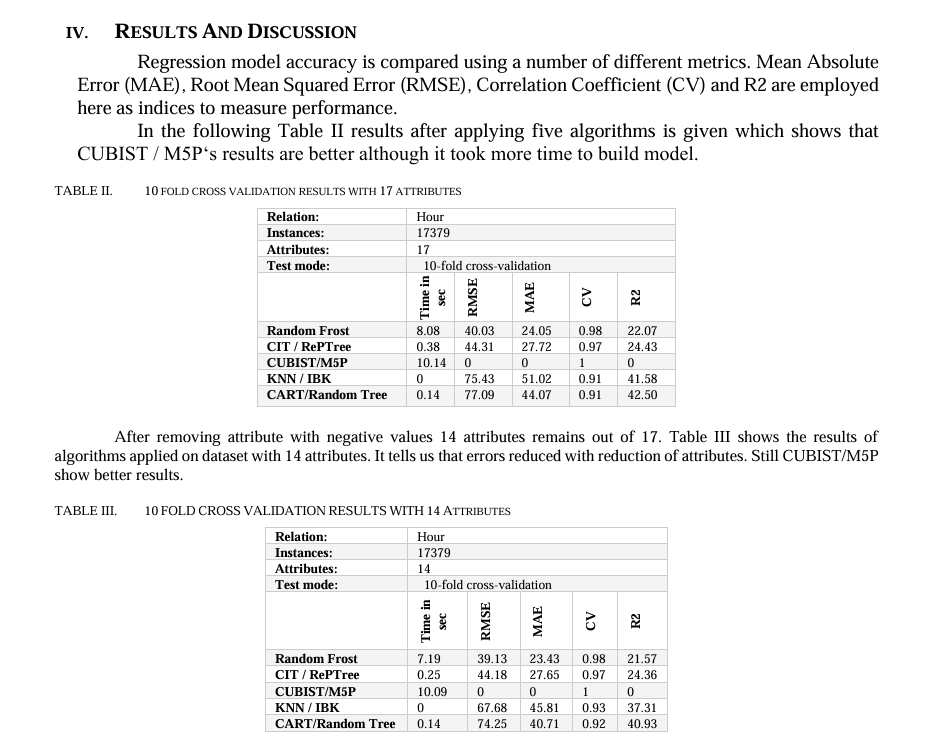  

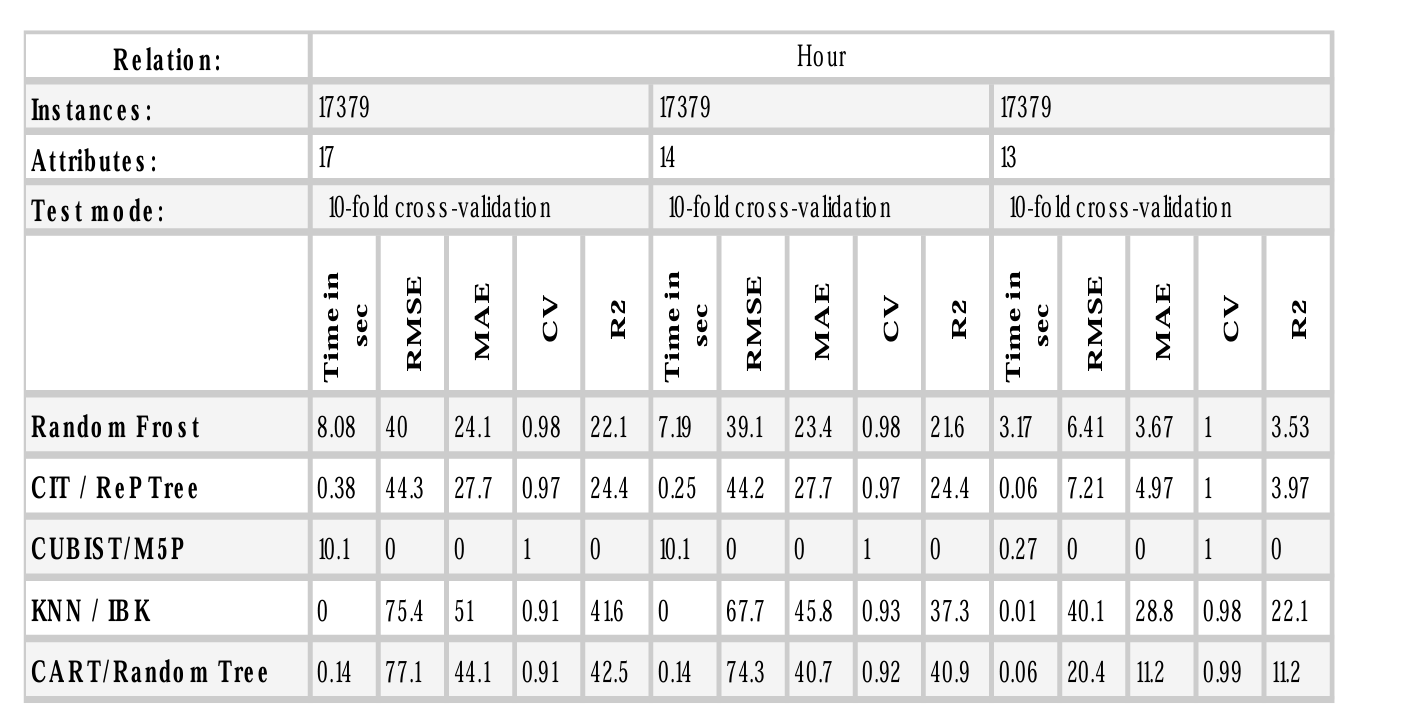

 This research estimated bike-sharing demand using Bike dataset. CUBIST outperforms RRF, CART, KNN, and CIT in R2, RMSE, MAE,
and CV. CUBIST can predict bike-share demand. Analyzing variable importance revealed hidden links. In all models, temperature or hour
best predicted bike rental demand. This study found many links. This increases knowledge. It helps model hourly bike rental demand.
CUBIST improves learning algorithms using rule-based learning. This study compares CUBIST to RRF, CART, KNN, and CIT to show
its superiority in hourly rental bike demand forecasting. These results help academics predict hourly bike rental demand and expand
empirically-based algorithms. Future research will predict hourly bike rental demand.

## <b><u>Abbreviation</u></b><br>
- **MSE - Mean Squared Error**<br>
- **RMSE - Root Mean Squred Error**</br>




## <b> Data Description </b>

### <b> The dataset contains information (datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered and count). In here we predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.</b>


### <b>Data Fields: </b>

- **datetime - hourly date + timestamp**
- **season -  1 = spring, 2 = summer, 3 = fall, 4 = winter**
-**holiday - whether the day is considered a holiday**
-**workingday - whether the day is neither a weekend nor holiday**
-**weather** -
               1: Clear, Few clouds, Partly cloudy, Partly cloudy
               2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
               3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,
                  Light Rain + Scattered clouds
               4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
-**temp - temperature in Celsius**
-**atemp - "feels like" temperature in Celsius**
-**humidity - relative humidity**
-**windspeed - wind speed**
-**casual - number of non-registered user rentals initiated**
-**registered - number of registered user rentals initiated**
-**count - number of total rentals**

### Dataset Link - https://www.kaggle.com/c/bike-sharing-demand/data

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import math

#Libraries for preprocessing, model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/train.csv', encoding= 'ISO-8859–1')

In [ ]:
#First 100 rows
dataset.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
97,2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33
98,2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43,12.9980,1,87,88


In [ ]:
#Dimensions
dataset.shape

(10886, 12)

# **Exploratory Data Analysis**

In [ ]:
#Data types and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Dataset summary
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#Check for null values
dataset.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


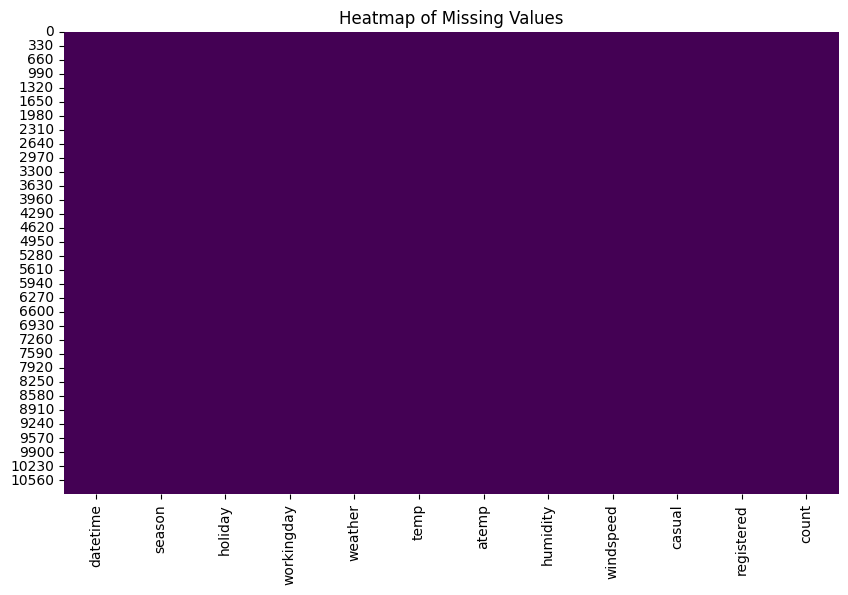

In [ ]:
#Visualization of not null values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
#Check for duplicates records
len(dataset[dataset.duplicated()])

0

In [ ]:
#Columns of the dataset
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
#Convert the 'Date' column to datetime format
if 'datetime' in dataset.columns:
    dataset['datetime'] = pd.to_datetime(dataset['datetime'])
    print("datetime column converted to datetime format.")
else:
    print("Column 'datetime' does not exist in the dataset.")

#Map categorical values to numerical values in 'datetime'
dataset = dataset.assign(
    year=lambda x: pd.Categorical(x['datetime'].dt.year), #Year
    month=lambda x: pd.Categorical(
        x['datetime'].dt.month_name(), #Month
        categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ),
    day=lambda x: pd.Categorical(x['datetime'].dt.day), #Date
    dayofweek=lambda x: pd.Categorical(
        x['datetime'].dt.day_name(), #Name of the day
        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        ordered=True
    ),
    hour=lambda x: pd.Categorical(x['datetime'].dt.hour), #Hour

    #Map categorical features to numerical values in 'datetime'
    season=lambda x: pd.Categorical(x['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})), #Season
    holiday=lambda x: pd.Categorical(x['holiday'].map({0: 'Normal', 1: 'Holiday'})), #Holiday
    workingday=lambda x: pd.Categorical(x['workingday'].map({0: 'Rest', 1: 'Work'})), #Working day
    weather=lambda x: pd.Categorical(x['weather'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})), #Weather
)

#Updated dataset
print(dataset.head())

datetime column converted to datetime format.
             datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring  Normal       Rest   Clear  9.84  14.395   
1 2011-01-01 01:00:00  Spring  Normal       Rest   Clear  9.02  13.635   
2 2011-01-01 02:00:00  Spring  Normal       Rest   Clear  9.02  13.635   
3 2011-01-01 03:00:00  Spring  Normal       Rest   Clear  9.84  14.395   
4 2011-01-01 04:00:00  Spring  Normal       Rest   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  year    month day  \
0        81        0.0       3          13     16  2011  January   1   
1        80        0.0       8          32     40  2011  January   1   
2        80        0.0       5          27     32  2011  January   1   
3        75        0.0       3          10     13  2011  January   1   
4        75        0.0       0           1      1  2011  January   1   

  dayofweek hour  
0  Saturday    0  
1  Saturday    1  
2  Saturday    2  


In [ ]:
dataset.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,Spring,Normal,Rest,Clear,9.84,14.395,81,0.0000,3,13,16,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,Spring,Normal,Rest,Clear,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,Spring,Normal,Rest,Clear,9.02,13.635,80,0.0000,5,27,32,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,Spring,Normal,Rest,Clear,9.84,14.395,75,0.0000,3,10,13,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,Spring,Normal,Rest,Clear,9.84,14.395,75,0.0000,0,1,1,2011,January,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,Spring,Normal,Work,Clear,9.84,11.365,48,15.0013,0,2,2,2011,January,5,Wednesday,4
96,2011-01-05 05:00:00,Spring,Normal,Work,Clear,9.02,11.365,47,11.0014,0,3,3,2011,January,5,Wednesday,5
97,2011-01-05 06:00:00,Spring,Normal,Work,Clear,8.20,9.850,47,15.0013,0,33,33,2011,January,5,Wednesday,6
98,2011-01-05 07:00:00,Spring,Normal,Work,Clear,7.38,9.090,43,12.9980,1,87,88,2011,January,5,Wednesday,7


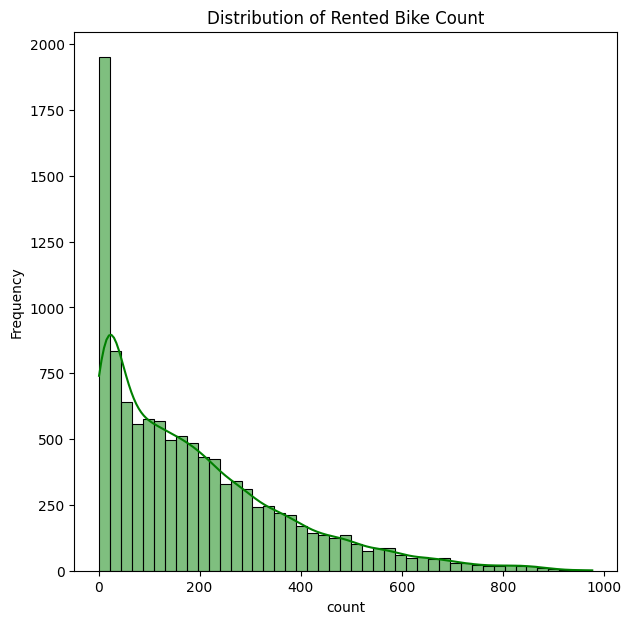

In [ ]:
#Distribution of the dependent varibale using a histogram
if 'count' in dataset.columns:
    plt.figure(figsize=(7, 7))
    sns.histplot(dataset['count'], color="g", kde=True)
    plt.title('Distribution of Rented Bike Count')
    plt.xlabel('count')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Rented Bike Count' does not exist in the dataset.")

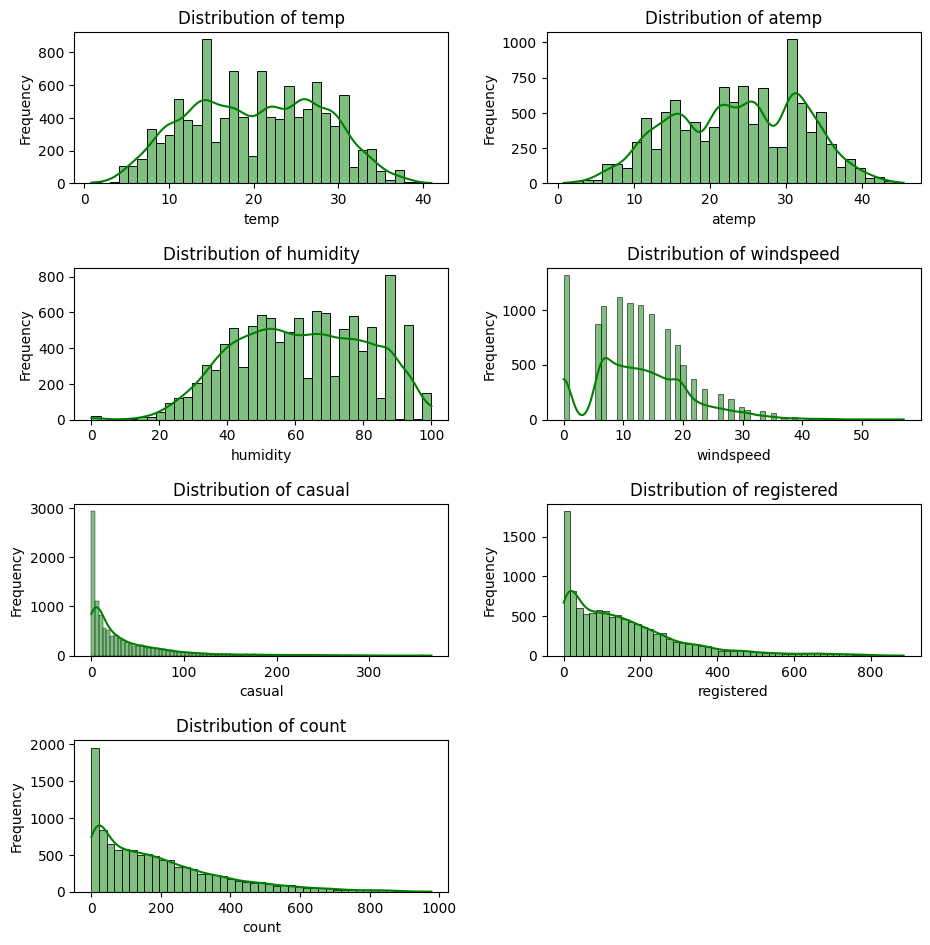

In [ ]:
#Distribution of all features using histograms
columns = [
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'casual',
    'registered',
    'count'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
fig.tight_layout(pad=4.0)

axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(dataset[column], kde=True, ax=axes[i], color="g")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[7].axis('off')


plt.show()

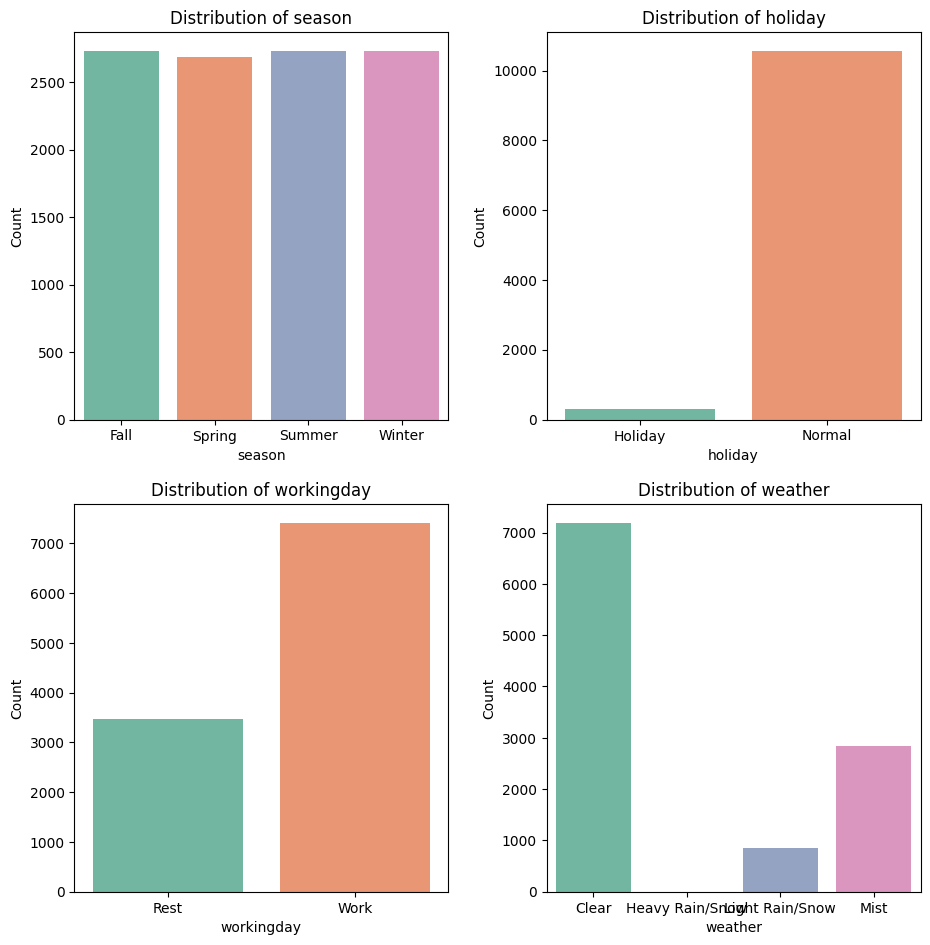

In [ ]:
#Distribution of categorical features using bar charts
categorical_columns = [
    'season',
    'holiday',
    'workingday',
    'weather'
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.tight_layout(pad=4.0)

axes = axes.flatten()

#Iteration of indices and values
for i, column in enumerate(categorical_columns):
    sns.countplot(data=dataset, x=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.show()

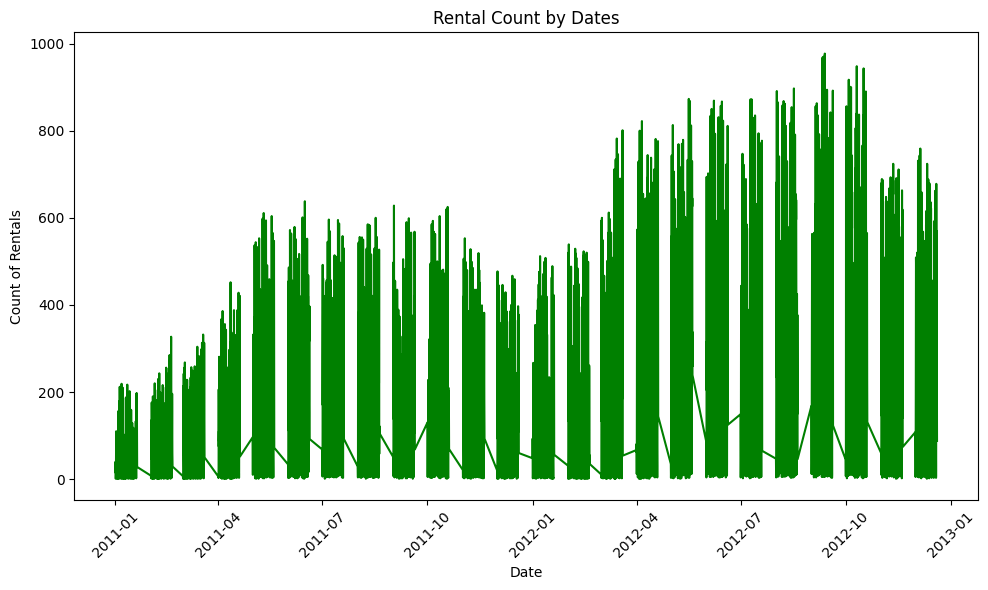

In [ ]:
#Visualization of the rental count over time
plt.figure(figsize=(10, 6))
plt.plot(
    dataset['datetime'], dataset['count'],
    color='g'
)

plt.xlabel('Date')
plt.ylabel('Count of Rentals')
plt.title('Rental Count by Dates')

#Improve readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

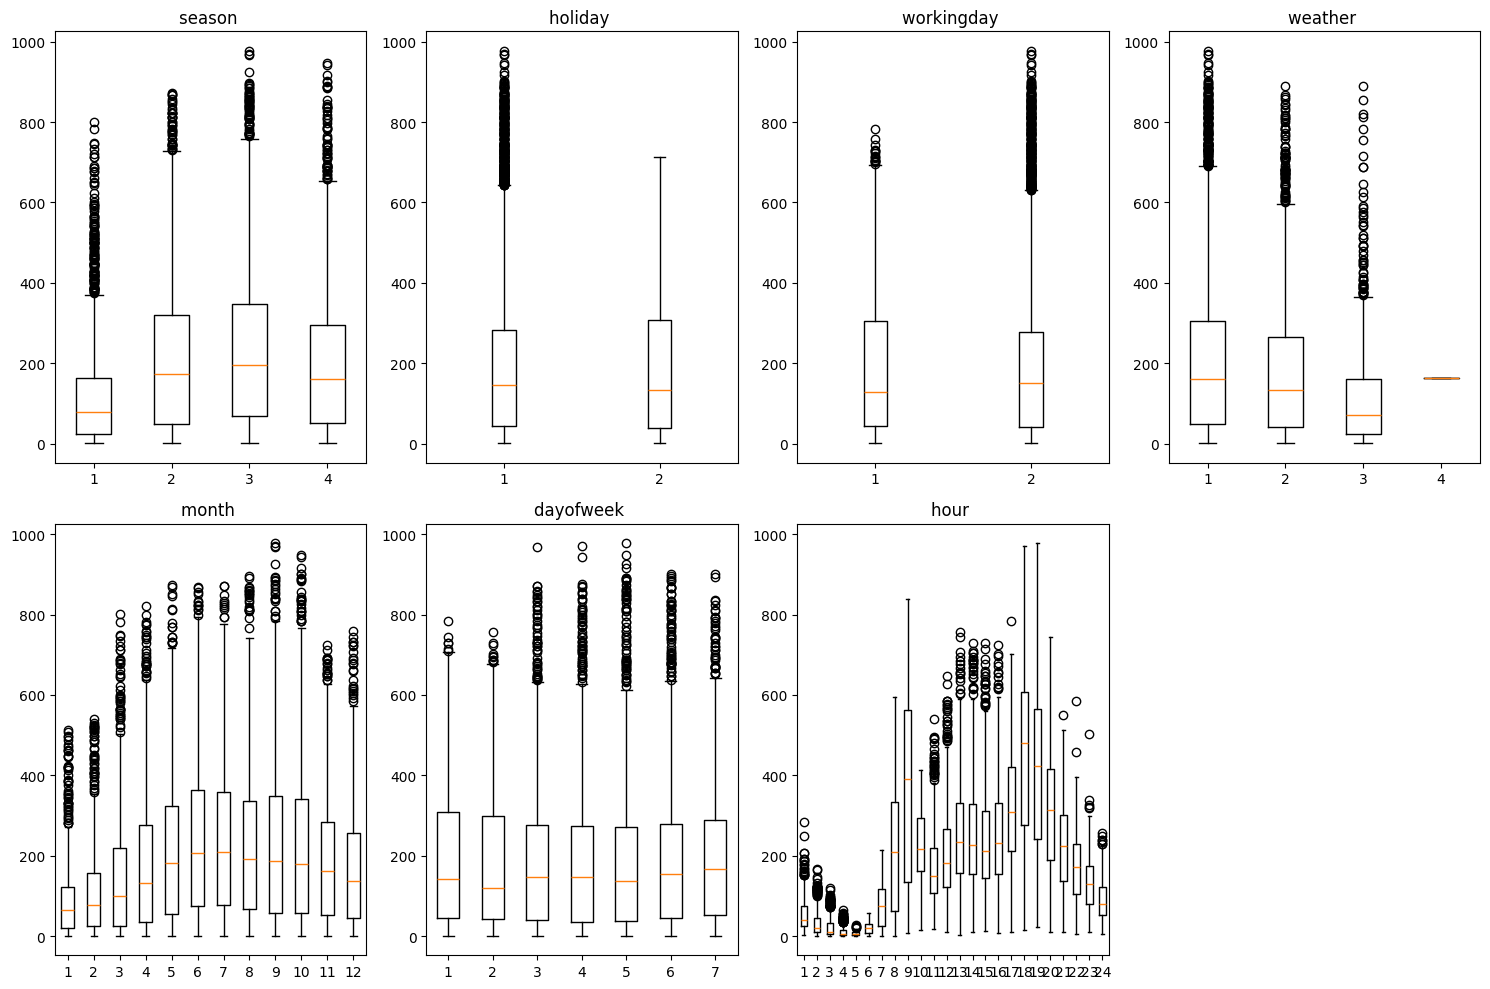

In [ ]:
#Boxplots for detecting outliers in categorical features
columns_category = ['season', 'holiday', 'workingday', 'weather', 'month', 'dayofweek', 'hour']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

axes = axes.flatten()

#Iteration over index and the value
for i, cat in enumerate(columns_category):
    grouped_data = [dataset[dataset[cat] == category]['count'] for category in dataset[cat].unique()]

    axes[i].boxplot(grouped_data)
    axes[i].set_title(f'{cat} ')

for i in range(len(columns_category), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Numeric dataset shape: (10886, 7)


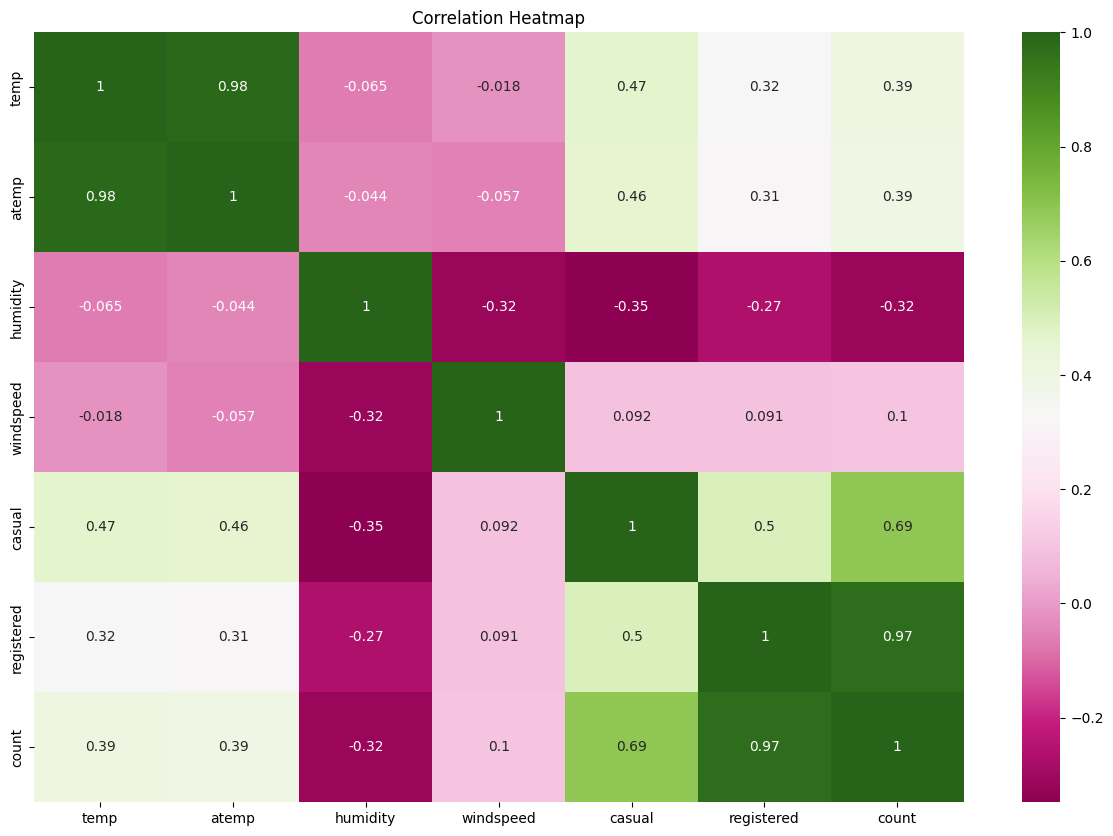

In [ ]:
#Correlation Heatmap for numerical features
numeric_dataset = dataset.select_dtypes(include=['number'])

print("Numeric dataset shape:", numeric_dataset.shape)

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_dataset.corr(), cmap='PiYG', annot=True)
plt.title('Correlation Heatmap')
plt.show()

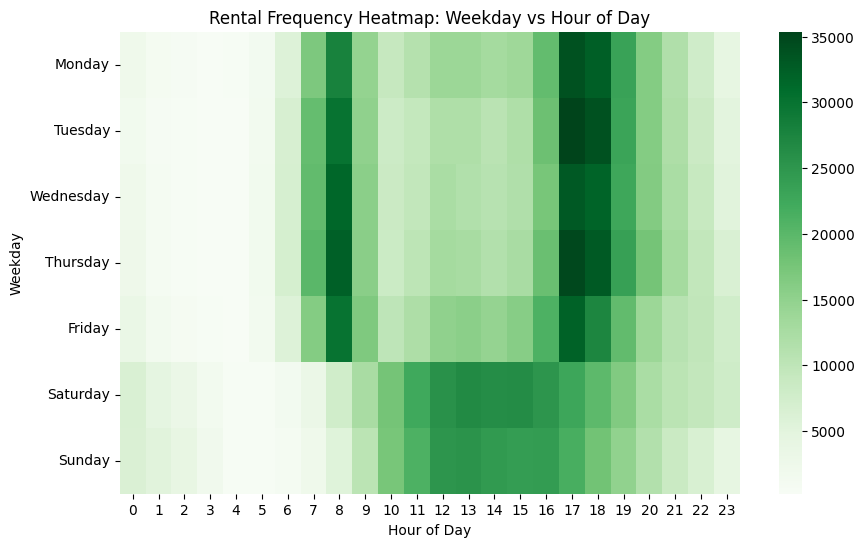

In [ ]:
#Visual representation of rental frequency by weekday and hour using a heatmap
dataset_heatmap = dataset.groupby(['dayofweek', 'hour']).agg({'count':'sum'}).reset_index()
dataset_heatmap_pivot = dataset_heatmap.pivot(index='dayofweek', columns='hour', values='count')

# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset_heatmap_pivot, cmap='Greens', fmt='g')

plt.title('Rental Frequency Heatmap: Weekday vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

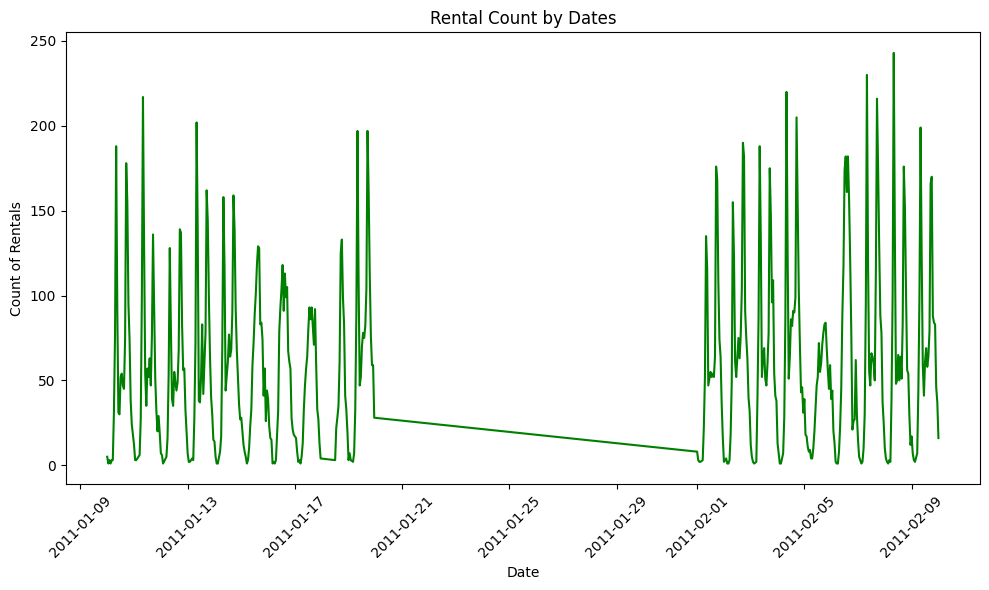

In [ ]:
#Visulation of rental count over time for a month
dataset_broken_dates = dataset.loc[
    (dataset['datetime'] >= pd.to_datetime('2011-01-10')) &
    (dataset['datetime'] <= pd.to_datetime('2011-02-10'))
]
dataset_broken_dates
plt.figure(figsize=(10, 6))
plt.plot(
    dataset_broken_dates['datetime'], dataset_broken_dates['count'],
    color='g'
)

plt.xlabel('Date')
plt.ylabel('Count of Rentals')
plt.title('Rental Count by Dates')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
dataset.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,Spring,Normal,Rest,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,Spring,Normal,Rest,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,Spring,Normal,Rest,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,1,Saturday,2


# **Data Preprocessing**

In [ ]:
# Drop the 'registered' and 'casual' columns
dataset = dataset.drop(['registered', 'casual'], axis=1)

# Combine 'temp' and 'atemp' into a new column 'temp_combined'
dataset['temp_combined'] = dataset['temp'] + dataset['atemp']
dataset = dataset.drop(['temp', 'atemp'], axis=1)

print(dataset.head())


             datetime  season holiday workingday weather  humidity  windspeed  \
0 2011-01-01 00:00:00  Spring  Normal       Rest   Clear        81        0.0   
1 2011-01-01 01:00:00  Spring  Normal       Rest   Clear        80        0.0   
2 2011-01-01 02:00:00  Spring  Normal       Rest   Clear        80        0.0   
3 2011-01-01 03:00:00  Spring  Normal       Rest   Clear        75        0.0   
4 2011-01-01 04:00:00  Spring  Normal       Rest   Clear        75        0.0   

   count  year    month day dayofweek hour  temp_combined  
0     16  2011  January   1  Saturday    0         24.235  
1     40  2011  January   1  Saturday    1         22.655  
2     32  2011  January   1  Saturday    2         22.655  
3     13  2011  January   1  Saturday    3         24.235  
4      1  2011  January   1  Saturday    4         24.235  


In [ ]:
# Mapping values for categorical columns
dataset['season'] = dataset['season'].map({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})
dataset['holiday'] = dataset['holiday'].map({'Normal': 0, 'Holiday': 1})
dataset['workingday'] = dataset['workingday'].map({'Rest': 0, 'Work': 1})
dataset['weather'] = dataset['weather'].map({'Clear': 1, 'Mist': 2, 'Light Rain/Snow': 3, 'Heavy Rain/Snow': 4})

# Encoding month
month_mapping = {month: idx for idx, month in enumerate(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July',
     'August', 'September', 'October', 'November', 'December'], 1)}
dataset['month'] = dataset['month'].map(month_mapping)

# Encoding dayofweek
day_mapping = {day: idx for idx, day in enumerate(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1)}
dataset['dayofweek'] = dataset['dayofweek'].map(day_mapping)

print(dataset.head())


             datetime season holiday workingday weather  humidity  windspeed  \
0 2011-01-01 00:00:00      1       0          0       1        81        0.0   
1 2011-01-01 01:00:00      1       0          0       1        80        0.0   
2 2011-01-01 02:00:00      1       0          0       1        80        0.0   
3 2011-01-01 03:00:00      1       0          0       1        75        0.0   
4 2011-01-01 04:00:00      1       0          0       1        75        0.0   

   count  year month day dayofweek hour  temp_combined  
0     16  2011     1   1         6    0         24.235  
1     40  2011     1   1         6    1         22.655  
2     32  2011     1   1         6    2         22.655  
3     13  2011     1   1         6    3         24.235  
4      1  2011     1   1         6    4         24.235  


In [ ]:
#Drop 'datetime' column
dataset = dataset.drop(['datetime'], axis=1)

In [ ]:
print(dataset.head())

  season holiday workingday weather  humidity  windspeed  count  year month  \
0      1       0          0       1        81        0.0     16  2011     1   
1      1       0          0       1        80        0.0     40  2011     1   
2      1       0          0       1        80        0.0     32  2011     1   
3      1       0          0       1        75        0.0     13  2011     1   
4      1       0          0       1        75        0.0      1  2011     1   

  day dayofweek hour  temp_combined  
0   1         6    0         24.235  
1   1         6    1         22.655  
2   1         6    2         22.655  
3   1         6    3         24.235  
4   1         6    4         24.235  


In [ ]:
#Transformation of the 'count'
dataset['count_sqrt'] = np.sqrt(dataset['count'])

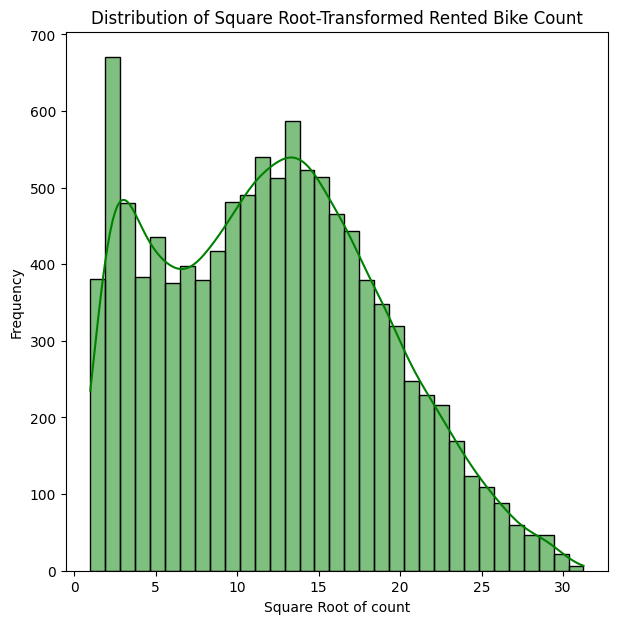

In [ ]:
#Distribution of the new count_sqrt feature using a histogram
plt.figure(figsize=(7, 7))
sns.histplot(dataset['count_sqrt'], color="g", kde=True)
plt.title('Distribution of Square Root-Transformed Rented Bike Count')
plt.xlabel('Square Root of count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print(dataset.head())

  season holiday workingday weather  humidity  windspeed  count  year month  \
0      1       0          0       1        81        0.0     16  2011     1   
1      1       0          0       1        80        0.0     40  2011     1   
2      1       0          0       1        80        0.0     32  2011     1   
3      1       0          0       1        75        0.0     13  2011     1   
4      1       0          0       1        75        0.0      1  2011     1   

  day dayofweek hour  temp_combined  count_sqrt  
0   1         6    0         24.235    4.000000  
1   1         6    1         22.655    6.324555  
2   1         6    2         22.655    5.656854  
3   1         6    3         24.235    3.605551  
4   1         6    4         24.235    1.000000  


In [ ]:
#Drop the 'count' feature
dataset = dataset.drop(['count'], axis=1)

In [ ]:
print(dataset.head())

  season holiday workingday weather  humidity  windspeed  year month day  \
0      1       0          0       1        81        0.0  2011     1   1   
1      1       0          0       1        80        0.0  2011     1   1   
2      1       0          0       1        80        0.0  2011     1   1   
3      1       0          0       1        75        0.0  2011     1   1   
4      1       0          0       1        75        0.0  2011     1   1   

  dayofweek hour  temp_combined  count_sqrt  
0         6    0         24.235    4.000000  
1         6    1         22.655    6.324555  
2         6    2         22.655    5.656854  
3         6    3         24.235    3.605551  
4         6    4         24.235    1.000000  


In [ ]:
#Preprocessed dataset
new_dataset = dataset.copy()
new_dataset.to_csv('transformed_bike_data.csv', index=False)

In [ ]:
print(new_dataset.head())

  season holiday workingday weather  humidity  windspeed  year month day  \
0      1       0          0       1        81        0.0  2011     1   1   
1      1       0          0       1        80        0.0  2011     1   1   
2      1       0          0       1        80        0.0  2011     1   1   
3      1       0          0       1        75        0.0  2011     1   1   
4      1       0          0       1        75        0.0  2011     1   1   

  dayofweek hour  temp_combined  count_sqrt  
0         6    0         24.235    4.000000  
1         6    1         22.655    6.324555  
2         6    2         22.655    5.656854  
3         6    3         24.235    3.605551  
4         6    4         24.235    1.000000  


In [ ]:
dataset.shape

(10886, 13)

In [ ]:
#Treating outlliers
numeric_data = dataset.select_dtypes(include='number')

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()
print("Outliers count for each numeric column:")
print(outliers)


Outliers count for each numeric column:
humidity          22
windspeed        227
temp_combined      0
count_sqrt         0
dtype: int64


In [ ]:
# Remove rows with outliers
trimmed_dataset = dataset[
    ~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)
]

print(f"Original dataset size: {dataset.shape}")
print(f"Trimmed dataset size: {trimmed_dataset.shape}")


Original dataset size: (10886, 13)
Trimmed dataset size: (10638, 13)


In [ ]:
dataset.shape


(10886, 13)

# **Model Implementation**

- **Chosen Algorithms:**<br>

<p>1. Linear Regression - is chosen as a baseline model due to its simplicity,
interpretability, and computational efficiency. It helps in quickly understanding the relationship between features and bike rental demand.</p>

<p style="margin-top: 50px"></p>

<p>2. Random Forest - Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction of the individual trees to improve accuracy and control overfitting.</p>


- **Code for Training:**<br>
- **Hyperparameter Settings:**<br>
<p style="margin-top: 50px; margin-left: 50px;"></p>

<p>This structure will help clearly communicate the hyperparameter tuning process to your audience.</p>

- **Evaluation Results:**<br>


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install lime

In [ ]:
# LIME SECTION
import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var,):

  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')
  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

In [ ]:
#Independent features
X = trimmed_dataset.drop(['count_sqrt'], axis=1)

In [ ]:
#Dependent feature
y = trimmed_dataset['count_sqrt']

In [ ]:
#spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7978, 12) (2660, 12) (7978,) (2660,)


**LINEAR REGRESSION**

Cross-Validation Scores (MSE): [12.97192555 12.98183666 13.03363719 13.29446771 13.60494515]
Average MSE: 13.1773624508966
Standard Deviation: 0.24398041397373246
Training Accuracy: 0.8062740438091771
Test Accuracy: 0.7148959830493085
\==\Evalution Graph\==



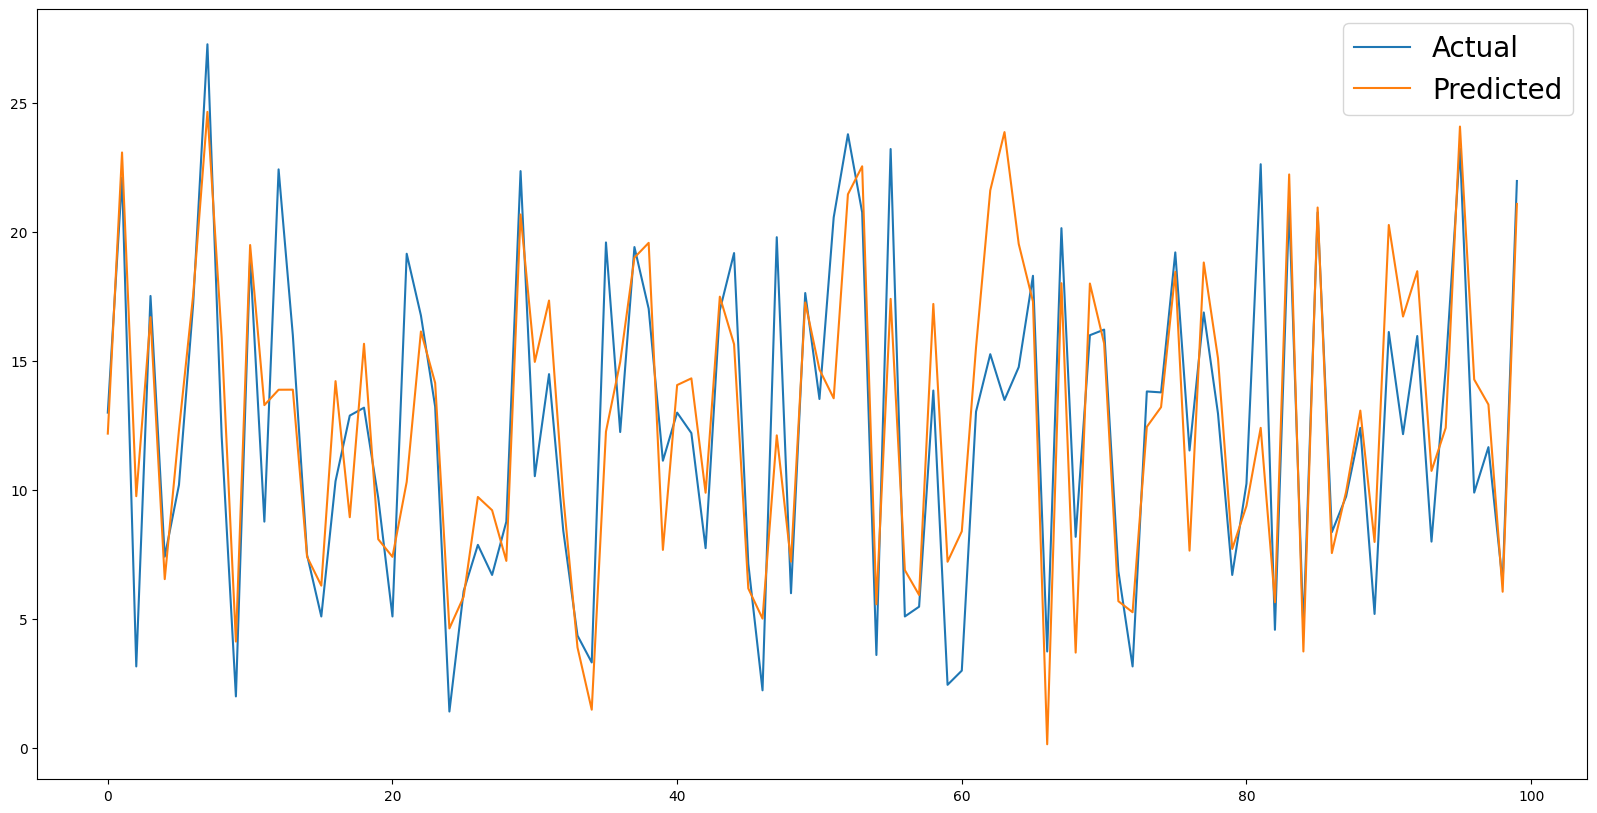

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# regularization
ridge_model = Ridge(alpha=7)

# k-fold cross validation
scores = cross_val_score(ridge_model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')


print("Cross-Validation Scores (MSE):", -scores)
print("Average MSE:", np.mean(-scores))
print("Standard Deviation:", np.std(-scores))

ridge_model.fit(X_train_poly, y_train)

train_accuracy = ridge_model.score(X_train_poly, y_train)
test_accuracy = ridge_model.score(X_test_poly, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print('\==\Evalution Graph\==\n')

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(ridge_model.predict(X_test_poly)[:100])
plt.legend(["Actual","Predicted"],prop={'size': 20})
plt.show()


**RANDOM FOREST**

Average MSE: 2.298379939041664
MSE Standard Deviation: 0.478592294757355
Training Accuracy: 0.9597016294479297
Test Accuracy: 0.9380950959873262
\==\Evalution Graph\==



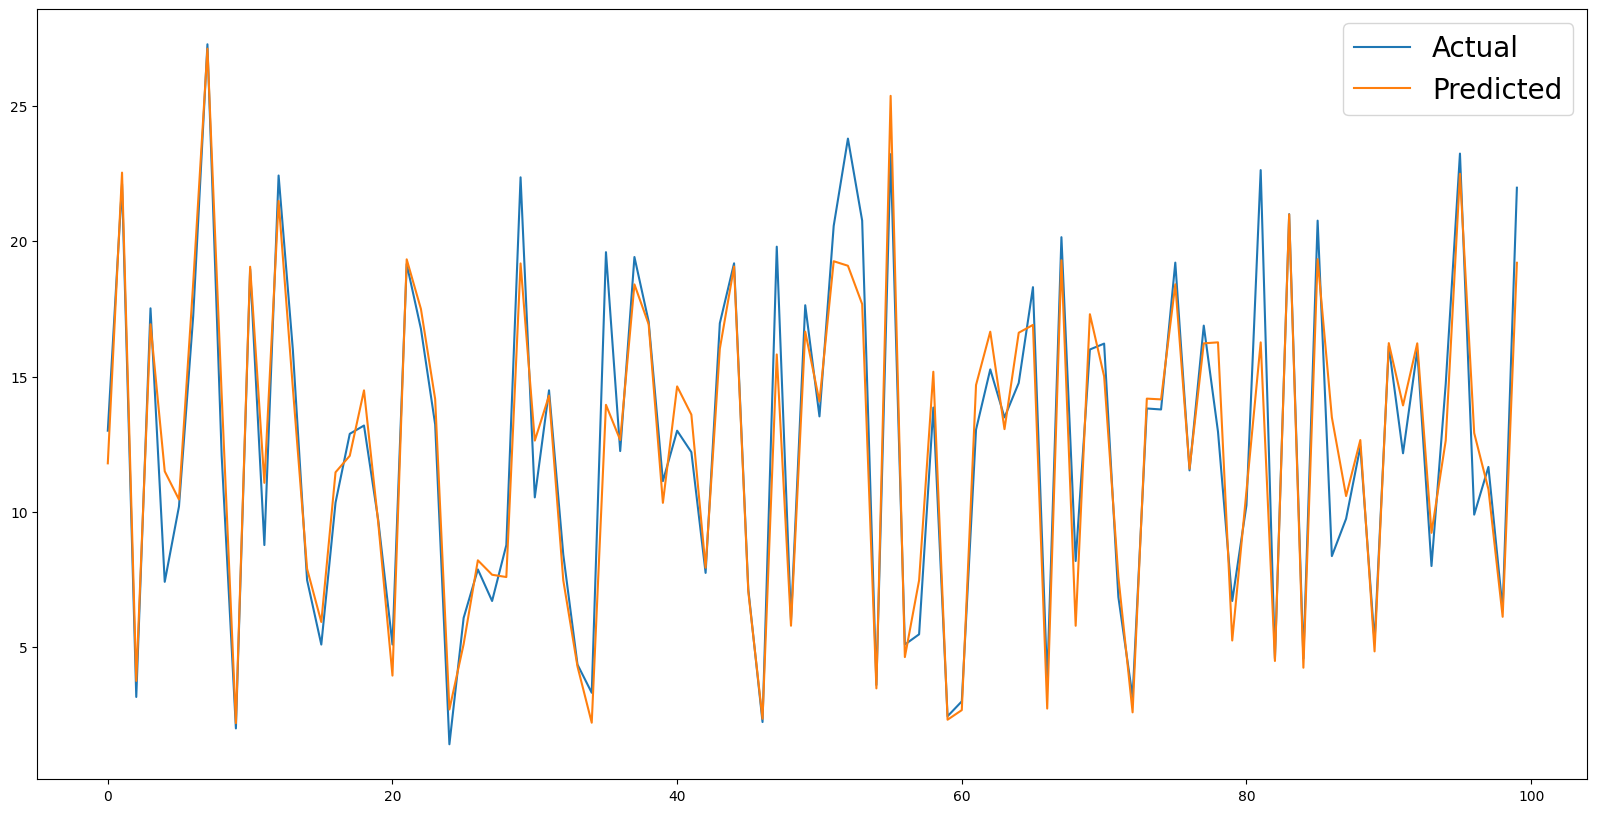

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# regularization parameters
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

mse_values = [train_mse, test_mse]
avg_mse = np.mean(mse_values)
mse_std = np.std(mse_values)

# Print results
print("Average MSE:", avg_mse)
print("MSE Standard Deviation:", mse_std)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print('\==\Evalution Graph\==\n')

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(rf_model.predict(X_test_scaled)[:100])
plt.legend(["Actual","Predicted"],prop={'size': 20})
plt.show()

# Model Evaluation and Discussion

1. Linear Regression

   **Evaluation Metrics:**
   
   - Average MSE: 13.1773624508966
   - Standard Deviation: 0.24398041397373246
  

   <br>
Linear Regression, being a simple and interpretable algorithm, served as a baseline model. However, its performance is limited,  (bike rental demand) is explained by the features. The high RMSE highlights the model's inability to capture complex patterns in the data, leading to significant prediction errors.

   <br>
1. Random Forest

   **Evaluation Metrics:**
   
   - Average Mean Squared Error (MSE): 2.298379939041664
   - MSE Standard Deviation: 0.478592294757355
  

   <br>
   Random Forest, a non-linear ensemble learning method, substantially outperformed Linear Regression. The low RMSE demonstrates the model's ability to accurately predict bike rental demand by capturing complex interactions between features such as weather, temperature, and time of day. Additionally, its robustness to overfitting and feature importance evaluation make it a valuable tool for this predictive task.

  
 **Discussion**


- **Error Metrics:** The lower MSE of Random Forest (2.3) compared to Linear Regression (13.2) highlights its ability to provide more precise predictions.

- **Model Complexity:** Linear Regression is computationally efficient but lacks the capacity to model non-linear relationships. Random Forest, while computationally intensive, effectively captures such relationships, making it better suited for this dataset.


# **Conclusions**


In this analysis, two machine learning algorithms—Linear Regression and Random Forest—were implemented to predict the bike rental demand . After evaluating the models on accuracy and other relevant metrics:

- **Linear Regression** demonstrated [insert performance summary, e.g., moderate accuracy and interpretability].

- **Random Forest** outperformed Linear Regression in terms of accuracy, likely due to its ability to capture non-linear relationships and manage data complexities.

Based on the results, **Random Forest is recommended** for this predictive task, as it balances accuracy and robustness. However, the choice of algorithm may also depend on the need for model interpretability and computational constraints in deployment. Future improvements may involve fine-tuning hyperparameters or exploring other algorithms like Gradient Boosting or Neural Networks for enhanced performance.



# **References**

- **ResearchGate - https://www.researchgate.net/publication/368958424_Demand_Prediction_on_Bike_Sharing_Data_Using_Regression_Analysis_Approach?enrichId=rgreq-0991d1380472f2484da80ca66799b85d-XXX&enrichSource=Y292ZXJQYWdlOzM2ODk1ODQyNDtBUzoxMTQzMTI4MTE0ODU0MTk2OUAxNjgxNzE5NTEyODI4&el=1_x_3&_esc=publicationCoverPdf**

# **Feedback**



*   Our linear regression model appears to be experiencing overfitting, which
suggests that it is capturing noise in the training data rather than the underlying patterns. To address this issue, we considered implementing regularization techniques such as Lasso or Ridge regression, which can help reduce the complexity of the model and improve generalization.
*   Additionally, incorporating cross-validation will provide a more robust evaluation of your model's performance across different subsets of the data.
*   We are told that our project was overall good and we had done an extensive EDA  analysis.


